In [1]:
from pysummarization.abstractablesemantics.re_seq_2_seq import ReSeq2Seq

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)
logger = getLogger("pysummarization")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)


In [3]:
document = """
An encyclopedia or encyclopædia is a reference work or compendium providing summaries of knowledge from either all branches or from a particular field or discipline.[1] Encyclopedias are divided into articles or entries that are often arranged alphabetically by article name[2] and sometimes by thematic categories. Encyclopedia entries are longer and more detailed than those in most dictionaries.[2] Generally speaking, unlike dictionary entries—which focus on linguistic information about words, such as their etymology, meaning, pronunciation, use, and grammatical forms—encyclopedia articles focus on factual information concerning the subject named in the article's title.[3][4][5][6]

Encyclopedias have existed for around 2,000 years and have evolved considerably since that time as to language (written in a major international or a vernacular language), size (few or many volumes), intent (presentation of a global or a limited range of knowledge), cultural perceptions (authoritative, ideological, didactic, utilitarian), authorship (qualifications, style), readership (education level, background, interests, capabilities), and the technologies available for their production and distribution (hand-written manuscripts, small or large print runs, internet production). As a valued source of reliable information compiled by experts, printed versions found a prominent place in libraries, schools and other educational institutions.

The appearance of digital and open-source versions in the 20th century has vastly expanded the accessibility, authorship, readership, and variety of encyclopedia entries and called into question the idea of what an encyclopedia is[citation needed] and the relevance of applying to such dynamic productions the traditional criteria for assembling and evaluating print encyclopedias.[citation needed]

Title page of Skalich's Encyclopaedia, seu orbis disciplinarum, tam sacrarum quam prophanarum, epistemon from 1559, first clear use of the word encyclopaedia in the title.[14]
Sixteenth century usage of the compounded word
In the sixteenth century there was a level of ambiguity as to how to use this new word. As several titles illustrate, there was not a settled notion about its spelling nor its status as a noun. For example: Jacobus Philomusus's Margarita philosophica encyclopaediam exhibens (1508); Johannes Aventinus's Encyclopedia orbisque doctrinarum, hoc est omnium artium, scientiarum, ipsius philosophiae index ac divisio; Joachimus Fortius Ringelbergius's Lucubrationes vel potius absolutissima kyklopaideia (1538, 1541); Paul Skalich's Encyclopaediae sen orbis disciplinarum epistemon (1559); Gregor Reisch's Margarita philosophica (1503, retitled Encyclopaedia in 1583); and Samuel Eisenmenger's Cyclopaedia Paracelsica (1585).[15] It is only with Pavao Skalić and his Encyclopediae seu orbis disciplinarum tam sacrarum quam profanarum epistemon (Encyclopaedia, or Knowledge of the World of Disciplines, Basel, 1559) that the term became first recognized as a noun.[citation needed]

There have been two examples of the oldest vernacular use of the compounded word. In approximately 1490, Franciscus Puccius wrote a letter to Politianus thanking him for his Miscellanea, calling it an encyclopedia.[16] More commonly, François Rabelais is cited for his use of the term in Pantagruel (1532).[17][18]

The suffix -p(a)edia
Several encyclopedias have names that include the suffix -p(a)edia, to mark the text as belonging to the genre of encyclopedias. For example, Banglapedia (on matters relevant for Bangladesh).

Contemporary usage
Today in English, the word is most commonly spelled encyclopedia, though encyclopaedia (from encyclopædia) is also used in Britain.[19]

Characteristics
The modern encyclopedia was developed from the dictionary in the 18th century. Historically, both encyclopedias and dictionaries have been researched and written by well-educated, well-informed content experts, but they are significantly different in structure. A dictionary is a linguistic work which primarily focuses on alphabetical listing of words and their definitions. Synonymous words and those related by the subject matter are to be found scattered around the dictionary, giving no obvious place for in-depth treatment. Thus, a dictionary typically provides limited information, analysis or background for the word defined. While it may offer a definition, it may leave the reader lacking in understanding the meaning, significance or limitations of a term, and how the term relates to a broader field of knowledge. An encyclopedia is, theoretically, not written in order to convince, although one of its goals is indeed to convince its reader of its own veracity.

To address those needs, an encyclopedia article is typically not limited to simple definitions, and is not limited to defining an individual word, but provides a more extensive meaning for a subject or discipline. In addition to defining and listing synonymous terms for the topic, the article is able to treat the topic's more extensive meaning in more depth and convey the most relevant accumulated knowledge on that subject. An encyclopedia article also often includes many maps and illustrations, as well as bibliography and statistics.

Four major elements define an encyclopedia: its subject matter, its scope, its method of organization, and its method of production:


"""

In [4]:
from pysummarization.nlp_base import NlpBase
from pysummarization.tokenizabledoc.simple_tokenizer import SimpleTokenizer

In [5]:
nlp_base = NlpBase()
nlp_base.delimiter_list = [".", "\n"]
tokenizable_doc = SimpleTokenizer()
sentence_list = nlp_base.listup_sentence(document)
token_list = tokenizable_doc.tokenize(document)

In [6]:
sentence_list, len(sentence_list)

(['An encyclopedia or encyclopædia is a reference work or compendium providing summaries of knowledge from either all branches or from a particular field or discipline.\n',
  '[1] Encyclopedias are divided into articles or entries that are often arranged alphabetically by article name[2] and sometimes by thematic categories.\n',
  ' Encyclopedia entries are longer and more detailed than those in most dictionaries.\n',
  "[2] Generally speaking, unlike dictionary entries—which focus on linguistic information about words, such as their etymology, meaning, pronunciation, use, and grammatical forms—encyclopedia articles focus on factual information concerning the subject named in the article's title.\n",
  '[3][4][5][6]\n',
  'Encyclopedias have existed for around 2,000 years and have evolved considerably since that time as to language (written in a major international or a vernacular language), size (few or many volumes), intent (presentation of a global or a limited range of knowledge), 

In [7]:
len(list(set(token_list)))

438

In [8]:
token_arr = np.array(token_list)

In [9]:
from pysummarization.vectorizabletoken.t_hot_vectorizer import THotVectorizer

In [10]:
vectorizable_token = THotVectorizer(token_list=token_arr.tolist())

In [11]:
vector_list = vectorizable_token.vectorize(token_list=token_arr.tolist())
vector_arr = np.array(vector_list)

In [12]:
seq_len = 5

In [13]:
observed_list = []
for i in range(seq_len, vector_arr.shape[0]):
    observed_list.append(vector_arr[i-seq_len:i])
observed_arr = np.array(observed_list)
observed_arr.shape

(740, 5, 438)

In [14]:
observed_arr[0][-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [15]:
abstractable_semantics = ReSeq2Seq(
    margin_param=0.01,
    retrospective_lambda=0.5,
    retrospective_eta=0.5,
    encoder_decoder_controller=None,
    retrospective_encoder=None,
    input_neuron_count=observed_arr.shape[-1],
    hidden_neuron_count=256,
    weight_limit=0.5,
    dropout_rate=0.0,
    pre_learning_epochs=50,
    epochs=500,
    batch_size=20,
    learning_rate=1e-05,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    seq_len=seq_len,
    bptt_tau=seq_len,
    test_size_rate=0.3,
    tol=0.0
)

In [16]:
abstractable_semantics.learn(observed_arr=observed_arr, target_arr=observed_arr)

Best params are updated.
Epoch: 1
Loss: 
Training: 7.229956401396005e-06 Test: 7.000987985465347e-06
Best params are updated.
Epoch: 2
Loss: 
Training: 7.359849587362494e-06 Test: 6.973384238179334e-06
Epoch: 3
Loss: 
Training: 6.99825246555589e-06 Test: 6.972472126234156e-06
Epoch: 4
Loss: 
Training: 7.17412288675098e-06 Test: 6.887859916661025e-06
Epoch: 5
Loss: 
Training: 7.6585616972616e-06 Test: 8.068217830269294e-06
Epoch: 6
Loss: 
Training: 7.344643019016756e-06 Test: 7.435525209000359e-06
Epoch: 7
Loss: 
Training: 7.554179942965592e-06 Test: 6.917039835022499e-06
Epoch: 8
Loss: 
Training: 7.312296852469777e-06 Test: 7.007085476164417e-06
Epoch: 9
Loss: 
Training: 7.016554950019919e-06 Test: 7.241249346070246e-06
Epoch: 10
Loss: 
Training: 7.342572384905302e-06 Test: 7.044592474059573e-06
Epoch: 11
Loss: 
Training: 7.107726758402542e-06 Test: 7.115499080431247e-06
Rolling mean of Loss (Window is 10): 
Training: 7.299099018770432e-06 Test: 7.154841443712624e-06
Epoch: 12
Loss: 
T

Best params are updated.
Epoch: 6
Loss: 
Training: 3.13246735102439 Test: 3.1662200787274997
Epoch: 7
Loss: 
Training: 3.1613373670912135 Test: 3.152618040864898
Epoch: 8
Loss: 
Training: 3.1596397475317644 Test: 3.1479272266909915
Best params are updated.
Epoch: 9
Loss: 
Training: 3.102915941362613 Test: 3.1496096322100766
Epoch: 10
Loss: 
Training: 3.1201131294586077 Test: 3.1880352667811853
Epoch: 11
Loss: 
Training: 3.1313167854894615 Test: 3.2136075268312148
Epoch: 12
Loss: 
Training: 3.15391845310872 Test: 3.1977626242828148
Epoch: 13
Loss: 
Training: 3.1621581929266758 Test: 3.1709914748444614
Epoch: 14
Loss: 
Training: 3.236684315222092 Test: 3.1455865168576636
Epoch: 15
Loss: 
Training: 3.225676005195098 Test: 3.1577610957367908
Epoch: 16
Loss: 
Training: 3.187147855598622 Test: 3.1839615792683444
Epoch: 17
Loss: 
Training: 3.1508228732757697 Test: 3.2033532612388855
Epoch: 18
Loss: 
Training: 3.159387410166645 Test: 3.151135007003586
Epoch: 19
Loss: 
Training: 3.1272678234265

Epoch: 117
Loss: 
Training: 7.218522780521364 Test: 4.854387758823469
Epoch: 118
Loss: 
Training: 4.548145549863069 Test: 2.3194181034018304
Epoch: 119
Loss: 
Training: 2.3085648298653694 Test: 3.233346151209893
Epoch: 120
Loss: 
Training: 2.2414450061167184 Test: 5.959907309780603
Epoch: 121
Loss: 
Training: 6.512174098232224 Test: 5.569426542627807
Epoch: 122
Loss: 
Training: 6.001767338323056 Test: 5.039609300076637
Epoch: 123
Loss: 
Training: 4.826223195488602 Test: 3.4067937872492986
Epoch: 124
Loss: 
Training: 3.7917153783453448 Test: 3.3093877502370255
Epoch: 125
Loss: 
Training: 5.747729802221887 Test: 5.043149099134008
Epoch: 126
Loss: 
Training: 6.175060538585822 Test: 6.1715447164056885
Epoch: 127
Loss: 
Training: 5.845765969631937 Test: 3.0378987189238518
Epoch: 128
Loss: 
Training: 3.1763519696662392 Test: 5.157138071194684
Epoch: 129
Loss: 
Training: 5.536120019070663 Test: 4.511586594970636
Epoch: 130
Loss: 
Training: 4.580057317787979 Test: 4.845596709844603
Epoch: 131


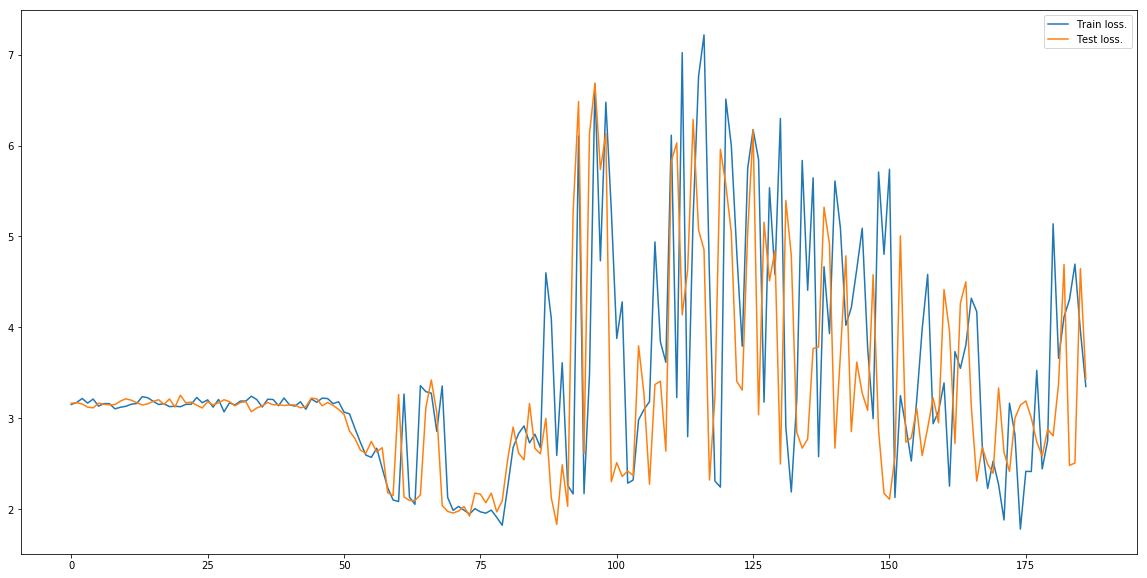

In [17]:
plt.figure(figsize=(20, 10))
plt.plot(
    abstractable_semantics.logs_arr[:, 0],
    label="Train loss."
)
plt.plot(
    abstractable_semantics.logs_arr[:, 1],
    label="Test loss."
)
plt.legend()
plt.show()

In [18]:
abstract_list = abstractable_semantics.summarize(
    observed_arr,
    vectorizable_token,
    sentence_list,
    limit=5
)

In [19]:
for a in abstract_list:
    print(a)

[15] It is only with Pavao Skalić and his Encyclopediae seu orbis disciplinarum tam sacrarum quam profanarum epistemon (Encyclopaedia, or Knowledge of the World of Disciplines, Basel, 1559) that the term became first recognized as a noun.

Several encyclopedias have names that include the suffix -p(a)edia, to mark the text as belonging to the genre of encyclopedias.

An encyclopedia or encyclopædia is a reference work or compendium providing summaries of knowledge from either all branches or from a particular field or discipline.

[16] More commonly, François Rabelais is cited for his use of the term in Pantagruel (1532).



In [20]:
from pysummarization.vectorizabletoken.thotvectorizer.dbm_t_hot_vectorizer import DBMTHotVectorizer

In [21]:
token_arr = np.array(token_list)
vectorizable_token = DBMTHotVectorizer(token_list=token_arr.tolist())

In [22]:
vectorizable_token.pre_learn()

In [23]:
vector_list = vectorizable_token.vectorize(token_list=token_arr.tolist())
vector_arr = np.array(vector_list)

In [24]:
vector_arr.shape

(745, 100)

In [25]:
seq_len = 5

In [26]:
observed_list = []
for i in range(seq_len, vector_arr.shape[0]):
    observed_list.append(vector_arr[i-seq_len:i])
observed_arr = np.array(observed_list)
observed_arr.shape

(740, 5, 100)

In [27]:
abstractable_semantics = ReSeq2Seq(
    margin_param=0.01,
    retrospective_lambda=0.5,
    retrospective_eta=0.5,
    encoder_decoder_controller=None,
    retrospective_encoder=None,
    input_neuron_count=observed_arr.shape[-1],
    hidden_neuron_count=observed_arr.shape[-1],
    weight_limit=0.5,
    dropout_rate=0.0,
    pre_learning_epochs=50,
    epochs=500,
    batch_size=20,
    learning_rate=1e-05,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    seq_len=seq_len,
    bptt_tau=seq_len,
    test_size_rate=0.3,
    tol=0.0
)

In [28]:
abstractable_semantics.learn(observed_arr=observed_arr, target_arr=observed_arr)

Best params are updated.
Epoch: 1
Loss: 
Training: 0.0002782750167029586 Test: 0.00030178023050308117
Epoch: 2
Loss: 
Training: 0.0002710107462840364 Test: 0.00021370064506088453
Epoch: 3
Loss: 
Training: 0.0002451036138885903 Test: 0.00027374446227082776
Epoch: 4
Loss: 
Training: 0.00023941835994813516 Test: 0.00024893109353738615
Epoch: 5
Loss: 
Training: 0.0002524183834444934 Test: 0.00027209318121958426
Epoch: 6
Loss: 
Training: 0.00022435089237743739 Test: 0.0002571400584698568
Epoch: 7
Loss: 
Training: 0.00025272070302422375 Test: 0.00023243067295610178
Best params are updated.
Epoch: 8
Loss: 
Training: 0.0003050860223614131 Test: 0.00023727601014215404
Epoch: 9
Loss: 
Training: 0.00030333895590821115 Test: 0.00021955870092439466
Epoch: 10
Loss: 
Training: 0.0002995321416092996 Test: 0.00021485151602172202
Epoch: 11
Loss: 
Training: 0.00024877376856797194 Test: 0.00023037062115849175
Rolling mean of Loss (Window is 10): 
Training: 0.00026712548355487995 Test: 0.000247150657110599

Best params are updated.
Epoch: 3
Loss: 
Training: 3.445975108925448 Test: 3.4665447402709213
Best params are updated.
Epoch: 4
Loss: 
Training: 3.434634677407355 Test: 3.462005883775122
Epoch: 5
Loss: 
Training: 3.5068998911996814 Test: 3.510812497669206
Epoch: 6
Loss: 
Training: 3.499004749150308 Test: 3.4689485911395335
Epoch: 7
Loss: 
Training: 3.469023344562572 Test: 3.4986308826962667
Epoch: 8
Loss: 
Training: 3.5035542822733645 Test: 3.453802908006872
Epoch: 9
Loss: 
Training: 3.508148958398559 Test: 3.4363035506190807
Epoch: 10
Loss: 
Training: 3.520273239502212 Test: 3.443025037232616
Epoch: 11
Loss: 
Training: 3.4740195446924567 Test: 3.5070488547066416
Best params are updated.
Epoch: 12
Loss: 
Training: 3.4144880753727893 Test: 3.4831955787019253
Epoch: 13
Loss: 
Training: 3.4620744626340207 Test: 3.4580293178715578
Epoch: 14
Loss: 
Training: 3.4691333422342563 Test: 3.425813398015775
Epoch: 15
Loss: 
Training: 3.4419044829095875 Test: 3.506161147847915
Epoch: 16
Loss: 
Trai

Epoch: 116
Loss: 
Training: 1.7655314081650595 Test: 1.8472075038768467
Epoch: 117
Loss: 
Training: 2.0231438826359103 Test: 1.4795865369284837
Epoch: 118
Loss: 
Training: 1.5582700271048644 Test: 1.5022171016444115
Epoch: 119
Loss: 
Training: 2.0470130964389086 Test: 2.025813913137216
Epoch: 120
Loss: 
Training: 3.457770092385751 Test: 2.1610780846575834
Epoch: 121
Loss: 
Training: 2.238863434423454 Test: 1.7924301945683678
Epoch: 122
Loss: 
Training: 3.3315127237987245 Test: 1.3234301675506321
Epoch: 123
Loss: 
Training: 1.5129100927766832 Test: 3.659576080453777
Epoch: 124
Loss: 
Training: 1.5432258202353615 Test: 1.5495742739447917
Epoch: 125
Loss: 
Training: 2.1553839028846147 Test: 1.1867348102262179
Best params are updated.
Epoch: 126
Loss: 
Training: 1.0195982191050492 Test: 3.0259537043187423
Epoch: 127
Loss: 
Training: 1.8911006374193167 Test: 1.4397308373588547
Epoch: 128
Loss: 
Training: 2.152284013579719 Test: 2.3416644643116893
Epoch: 129
Loss: 
Training: 3.25593734167305

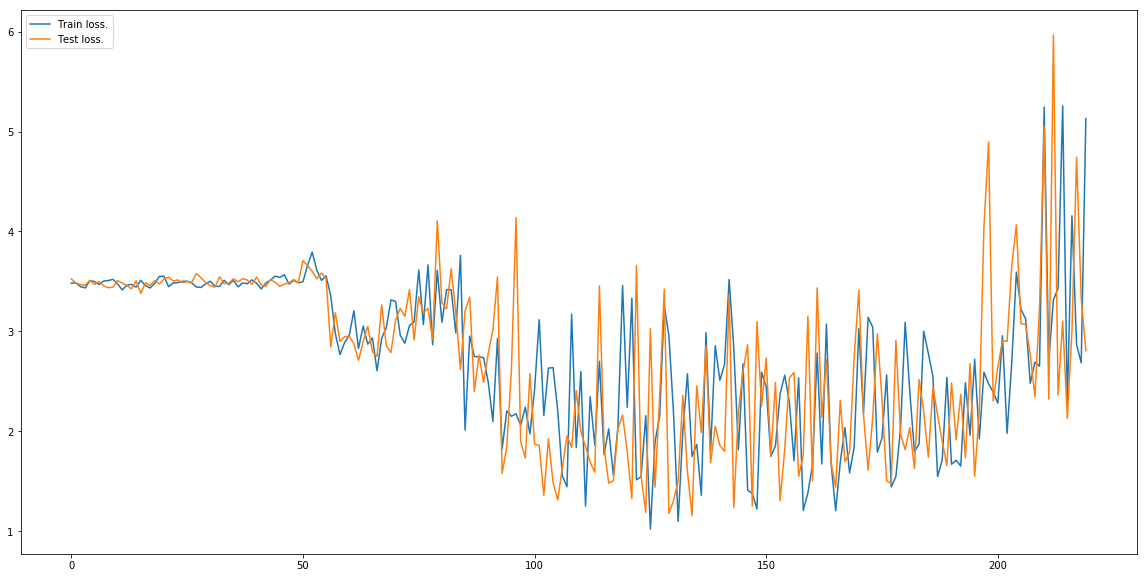

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))
plt.plot(
    abstractable_semantics.logs_arr[:, 0],
    label="Train loss."
)
plt.plot(
    abstractable_semantics.logs_arr[:, 1],
    label="Test loss."
)
plt.legend()
plt.show()

In [30]:
abstract_list = abstractable_semantics.summarize(
    observed_arr,
    vectorizable_token,
    sentence_list,
    limit=5
)

In [31]:
for a in abstract_list:
    print(a)

 As several titles illustrate, there was not a settled notion about its spelling nor its status as a noun.

Encyclopedias have existed for around 2,000 years and have evolved considerably since that time as to language (written in a major international or a vernacular language), size (few or many volumes), intent (presentation of a global or a limited range of knowledge), cultural perceptions (authoritative, ideological, didactic, utilitarian), authorship (qualifications, style), readership (education level, background, interests, capabilities), and the technologies available for their production and distribution (hand-written manuscripts, small or large print runs, internet production).

 Historically, both encyclopedias and dictionaries have been researched and written by well-educated, well-informed content experts, but they are significantly different in structure.

 For example: Jacobus Philomusus's Margarita philosophica encyclopaediam exhibens (1508); Johannes Aventinus's Encycl

In [32]:
a = [1, 2, 3]

In [33]:
a.pop(-1)

3

In [34]:
a

[1, 2]